In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

predicted_labels = np.load("./ndsb_dataset_nounk/predicted_labels_nounk.npy")
#predicted_labels = np.argmax(predictions, axis=1)

real_labels = np.load("./ndsb_dataset_nounk/real_labels_nounk.npy")

measures = np.load("focus_valid_ndsb_nounk.npy")

data = pd.DataFrame({'real':real_labels, 'predicted':predicted_labels, 'lapv':measures[:,0], 'lapm':measures[:,1], 'teng':measures[:,2]})

data 

,lapm,lapv,predicted,real,teng
0,0.053208,0.029542,104,97,0.209141
1,0.040871,0.021628,5,49,0.134877
2,0.032796,0.007352,14,14,0.089224
3,0.033605,0.010459,110,110,0.122677
4,0.019520,0.004816,40,40,0.012485
5,0.030839,0.005925,108,108,0.172301
6,0.046064,0.020812,6,5,0.167938
7,0.034617,0.005349,52,52,0.118808
8,0.021658,0.003238,11,11,0.034325
9,0.025261,0.004575,111,111,0.078382


In [2]:
true_false = np.zeros(len(real_labels), dtype=int)
for i in range(len(real_labels)):
    if predicted_labels[i] == real_labels[i]:
        true_false[i] = 1
measures_log = np.log(measures)

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


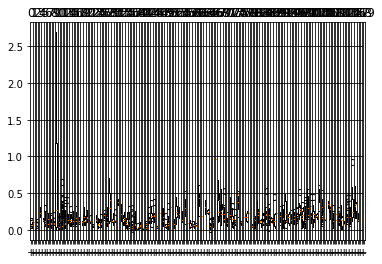

In [3]:
f, a = plt.subplots(1,120, sharex=False, sharey=True)

for i in range(120):
    box_true = data[data['predicted'] == i][data['real'] == i]['teng']
    box_false = data[data['predicted'] != i][data['real'] == i]['teng']
    a[i].boxplot([box_true, box_false], widths=1, labels=['+', '-'])
    a[i].set_title(i)
    
f.subplots_adjust(hspace=0)
plt.show()


C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


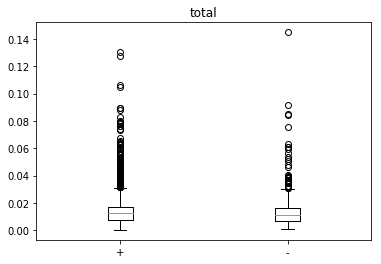

In [4]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']]['lapv']
box_false = data[data['predicted'] != data['real']]['lapv']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('total')
    
f.subplots_adjust(hspace=0)
plt.show()

Text(0,0.5,'Modified Laplacian')

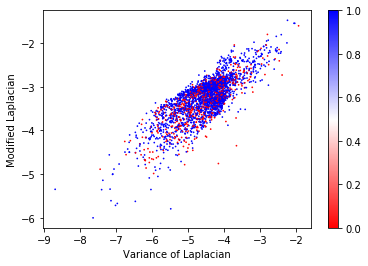

In [5]:
fig, ax = plt.subplots()
plt.scatter(measures_log[:,0], measures_log[:,1], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax.set_xlabel('Variance of Laplacian')
ax.set_ylabel('Modified Laplacian')

Text(0,0.5,'Tenengrad')

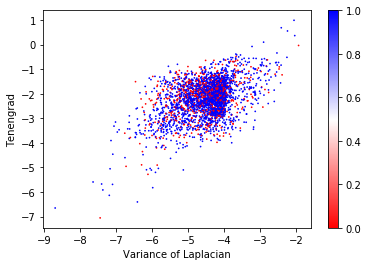

In [6]:
fig1, ax1 = plt.subplots()
plt.scatter(measures_log[:,0], measures_log[:,2], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax1.set_xlabel('Variance of Laplacian')
ax1.set_ylabel('Tenengrad')

Text(0,0.5,'Tenengrad')

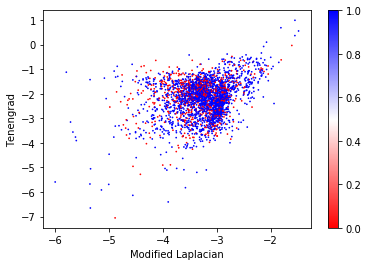

In [7]:
fig2, ax2 = plt.subplots()
plt.scatter(measures_log[:,1], measures_log[:,2], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax2.set_xlabel('Modified Laplacian')
ax2.set_ylabel('Tenengrad')

Text(0,0.5,'Predições negativas e positivas')

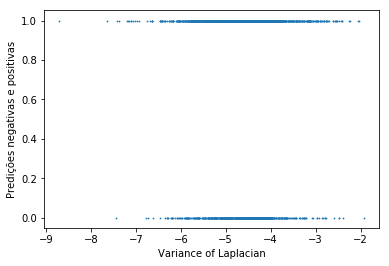

In [8]:
fig3, ax3 = plt.subplots()
plt.scatter(measures_log[:,0], true_false, s=0.6)

ax3.set_xlabel('Variance of Laplacian')
ax3.set_ylabel('Predições negativas e positivas')

Text(0,0.5,'Predições positivas')

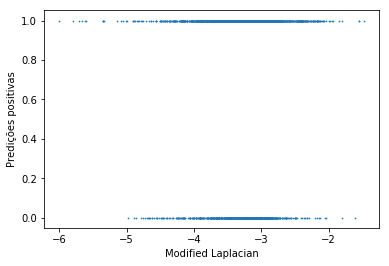

In [9]:
fig3, ax3 = plt.subplots()
plt.scatter(measures_log[:,1], true_false, s=0.5)

ax3.set_xlabel('Modified Laplacian')
ax3.set_ylabel('Predições positivas')

Text(0,0.5,'Predições positivas')

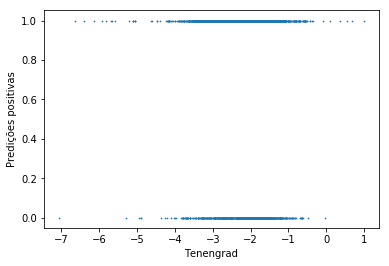

In [10]:
fig3, ax3 = plt.subplots()
plt.scatter(measures_log[:,2], true_false, s=0.5)

ax3.set_xlabel('Tenengrad')
ax3.set_ylabel('Predições positivas')

In [11]:
predicted_labels = np.load("./laps_nobg_100/predictions.npy")
#predicted_labels = np.argmax(predictions, axis=1)

real_labels = np.load("./laps_nobg_100/real_labels.npy")

measures = np.load("focus_valid_laps.npy")

data = pd.DataFrame({'real':real_labels, 'predicted':predicted_labels, 'lapv':measures[:,0], 'lapm':measures[:,1], 'teng':measures[:,2]})

data 

,lapm,lapv,predicted,real,teng
0,0.048364,0.021300,2,3,0.568961
1,0.043574,0.003948,13,7,0.112697
2,0.068513,0.012549,17,17,0.038338
3,0.059097,0.013817,0,1,0.195713
4,0.039253,0.005078,17,17,0.142213
5,0.024334,0.001220,6,6,0.071972
6,0.053925,0.004961,19,6,0.142350
7,0.052557,0.007729,3,3,0.236430
8,0.031889,0.003348,13,13,0.157160
9,0.049395,0.009363,10,10,0.147017


C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


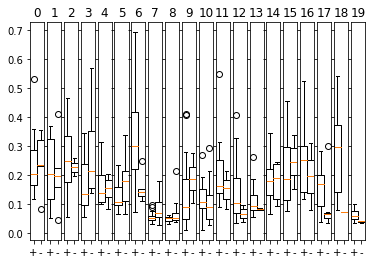

In [12]:
f, a = plt.subplots(1,20, sharex=False, sharey=True)

for i in range(20):
    box_true = data[data['predicted'] == i][data['real'] == i]['teng']
    box_false = data[data['predicted'] != i][data['real'] == i]['teng']
    a[i].boxplot([box_true, box_false], widths=1, labels=['+', '-'])
    a[i].set_title(i)
    
f.subplots_adjust(hspace=0)
plt.show()


C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


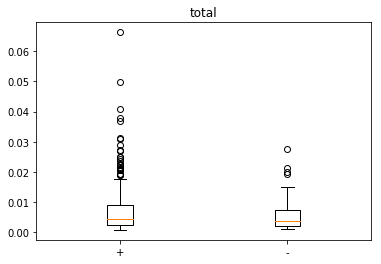

In [13]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']]['lapv']
box_false = data[data['predicted'] != data['real']]['lapv']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('total')
    
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


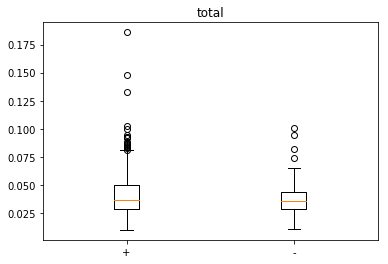

In [14]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']]['lapm']
box_false = data[data['predicted'] != data['real']]['lapm']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('total')
    
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


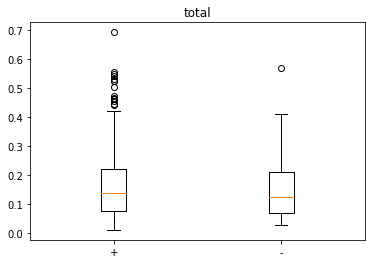

In [15]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']]['teng']
box_false = data[data['predicted'] != data['real']]['teng']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('total')
    
f.subplots_adjust(hspace=0)
plt.show()

Text(0,0.5,'Modified Laplacian')

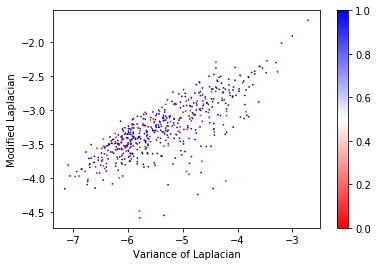

In [16]:
true_false = np.zeros(len(real_labels), dtype=int)
for i in range(len(real_labels)):
    if predicted_labels[i] == real_labels[i]:
        true_false[i] = 1
measures_log = np.log(measures)

fig10, ax10 = plt.subplots()
plt.scatter(measures_log[:,0], measures_log[:,1], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax10.set_xlabel('Variance of Laplacian')
ax10.set_ylabel('Modified Laplacian')

Text(0,0.5,'Tenengrad')

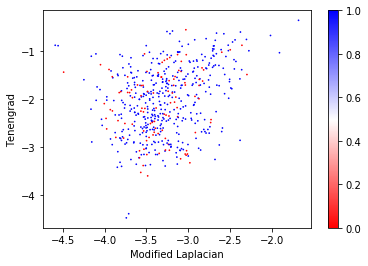

In [17]:
fig2, ax2 = plt.subplots()
plt.scatter(measures_log[:,1], measures_log[:,2], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax2.set_xlabel('Modified Laplacian')
ax2.set_ylabel('Tenengrad')

In [18]:
import gzip
train_path = "./laps_nobg_100/images_train.npy.gz"
#labels_path = "./laps_nobg_100/labels_train.npy.gz"
#with gzip.open(labels_path, "rb") as f:
#    labels = np.load(f)

#train_idx = np.load("./laps_nobg_100/indices_train.npy")
valid_idx = np.load("./laps_nobg_100/indices_valid.npy")

with gzip.open(train_path, "rb") as f:
    imgs = np.load(f)
    
img_valid = imgs[valid_idx]


lapm          0.043574
lapv          0.003948
predicted    13.000000
real          7.000000
teng          0.112697
Name: 1, dtype: float64


<function matplotlib.pyplot.show>

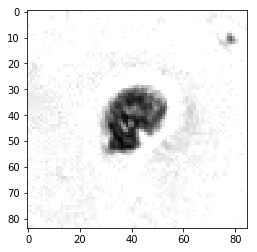

In [19]:
print(data.iloc[1])
plt.imshow(img_valid[1], cmap='gray')
plt.show

lapm          0.035452
lapv          0.002530
predicted    12.000000
real         12.000000
teng          0.157983
Name: 22, dtype: float64


<function matplotlib.pyplot.show>

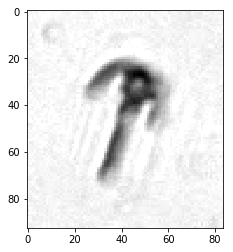

In [20]:
print(data.iloc[22])
plt.imshow(img_valid[22], cmap='gray')
plt.show

lapm         0.024334
lapv         0.001220
predicted    6.000000
real         6.000000
teng         0.071972
Name: 5, dtype: float64


<function matplotlib.pyplot.show>

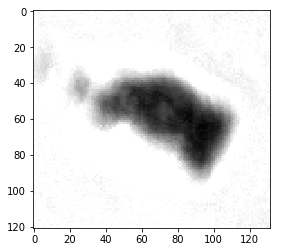

In [21]:
print(data.iloc[5])
plt.imshow(img_valid[5], cmap='gray')
plt.show

lapm          0.081599
lapv          0.010898
predicted    17.000000
real         17.000000
teng          0.203039
Name: 512, dtype: float64


<function matplotlib.pyplot.show>

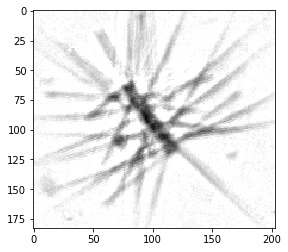

In [23]:
print(data.iloc[512])
plt.imshow(img_valid[512], cmap='gray')
plt.show

lapm          0.054094
lapv          0.005975
predicted    19.000000
real         19.000000
teng          0.081262
Name: 506, dtype: float64


<function matplotlib.pyplot.show>

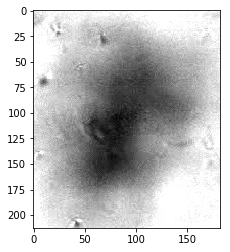

In [24]:
print(data.iloc[506])
plt.imshow(img_valid[506], cmap='gray')
plt.show